# 📰 NewsBot: AI-Powered News Digest with Gemma

Welcome to the **NewsBot** Notebook!

> In today's fast-paced world, staying informed without being overwhelmed is a constant challenge. This notebook provides a hands-on solution by demonstrating how to build a fully automated system for generating a concise, insightful news digest.

We will harness the power of **Gemma** 🧠, Google's family of lightweight, state-of-the-art open models, to perform sophisticated Natural Language Processing (NLP) tasks. The entire pipeline, from data fetching to final report, is handled right within this environment.

---


### 🛠️ Core Technologies of the first section

This project integrates several powerful tools to create the final digest:

* **Data Source:** A dedicated **News API** connection 🔗 to fetch the latest English-language articles focused on "Artificial Intelligence."
* **NLP Model:** **Gemma**, deployed via the **KerasNLP** library, for performing abstractive summarization.
* **Visualization:** Such as The **WordCloud**library 🖼️ to generate visual representations of key news trends.
* **Final Output:** A polished and shareable **HTML report** 📧.

---

### 🚀 The Digest Pipeline: From Raw Data to Final Report

This notebook guides you through each stage of the automated pipeline:

1.  **🌐 Data Acquisition**
    * We'll connect to the News API and pull a fresh batch of articles related to **AI**.

2.  **🧠 Intelligent Summarization**
    * You will use the Gemma model to condense lengthy articles into clear, digestible summaries. This process can be thought of as a function `$S(A) = s$`, where the model takes a full article `$A$` and produces a concise summary `$s$`.

3.  **📊 Insight & Visualization**
    * We'll analyze the summarized text to extract key themes and generate a compelling such as a **Word Cloud**, turning dense information into immediate visual insight.

4.  **✅ Report Generation**
    * Finally, all the generated content—summaries, trends, and the word cloud—will be compiled into a single, polished **HTML news digest**.

Get ready to transform your news consumption from a time-sink into a source of focused, **AI-driven insight**! 💡

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/config.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/tokenizer.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/metadata.json
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/model.weights.h5
/kaggle/input/gemma/keras/gemma_instruct_2b_en/3/assets/tokenizer/vocabulary.spm


In [2]:
!pip install -q -U keras
!pip install --upgrade keras-nlp
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.9/947.9 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
  Attempting uninstall: keras-nlp
    Found existing installation: keras-nlp 0.18.1
    Uninstalling keras-nlp-0.18.1:
      Successfully uninstalled keras-nlp-0.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: ml_dty

In [3]:
!pip uninstall -y tensorflow-text
!pip install tensorflow-text

Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.20.0
    Uninstalling tensorboard-2.20.0:
      Successfully uninstalled tensorboard-2.20.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.20.0
    Uninstalling tensorflow-2.20.0:
      Successfully uninstalled tensorflow-2.20.0
ERROR: pip's dependency resolver does 

In [4]:
!pip uninstall -y tensorflow-text

# Downgrade TensorFlow and its addons to 2.18.0
!pip install --upgrade --force-reinstall \
    tensorflow==2.18.0 \
    tensorboard==2.18.0 \
    tensorflow-text==2.18.0

Found existing installation: tensorflow-text 2.19.0
Uninstalling tensorflow-text-2.19.0:
  Successfully uninstalled tensorflow-text-2.19.0
  Using cached protobuf-5.29.5-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 451.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.0 MB/s eta 0:00:00
Using cached keras-3.11.3-py3-none-any.whl (1.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# Downgrade or reinstall gymnasium to the exact version required
!pip install --upgrade --force-reinstall gymnasium==0.29.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.2 MB/s eta 0:00:00
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 85.8 MB/s eta 0:00:00
Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Attempting uninstall: farama-notifications
    Found existing installation: Farama-Notifications 0.0.4
    Uninstalling Farama-Notifications-0.0.4:
      Successfully uninstalled Farama-Notifications-0.0.4
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.15.0
    Uninstalling typing_extensions-4.15.0:
      Successfully uninstalled typing_extensions-4.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: cloudpickle
    Found existing installation

In [6]:
os.environ["KERAS_BACKEND"] = "jax"  # Or "tensorflow" or "torch".
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.00"

In [7]:
import requests
import time

In [8]:
from kaggle_secrets import UserSecretsClient

NEWS_API_KEY = UserSecretsClient().get_secret("NEWS_API_KEY")

In [9]:
# Step 1: Define Endpoint
# url = f"https://newsapi.org/v2/top-headlines?country=us&apiKey={NEWS_API_KEY}"
# url = f"https://newsapi.org/v2/top-headlines?country=us&category=technology&apiKey={NEWS_API_KEY}"
url = f"https://newsapi.org/v2/everything?q=AI&language=en&apiKey={NEWS_API_KEY}"

def fetch_news():
    resp = requests.get(url)
    resp.raise_for_status()
    data = resp.json()
    print(f"{time.strftime('%Y-%m-%d %H:%M:%S')} – fetched {len(data['articles'])} articles")
    return data

# always fetch on notebook start
news_data = fetch_news()

2025-10-17 19:50:44 – fetched 100 articles


📰 Latest News Digest 📰
------------------------


,Source,Title,Description,URL,Published At
0,The Verge,New California law requires AI to tell you it’s AI,"A bill attempting to regulate the ever-growing industry of companion AI chatbots is now law in California, as of October 13th. California Gov. Gavin Newsom signed into law Senate Bill 243, billed as “first-in-the-nation AI chatbot safeguards” by state senator…",https://www.theverge.com/news/798875/california-just-passed-a-new-law-requiring-ai-to-tell-you-its-ai,2025-10-13 17:13
1,The Verge,Microsoft’s AI CEO on the future of the browser,"The AI browser wars are heating up. Google has Gemini in Chrome, Perplexity is building its Comet AI browser, and The Browser Company just got acquired by Atlassian for $610 million. Now, Microsoft wants to be part of the AI browser conversation. I sat down w…",https://www.theverge.com/tech/783795/microsoft-ai-ceo-mustafa-suleyman-future-of-browser-interview-notepad,2025-09-23 18:37
2,The Verge,Microsoft’s Windows AI Lab is a new way to test experimental features,"Microsoft is starting to test experimental AI-powered features through a new Windows AI Labs program. Some Windows testers spotted references to the Windows AI Labs program in pre-release updates to Microsoft Paint last week, and Microsoft has now confirmed t…",https://www.theverge.com/news/783475/microsoft-windows-ai-labs-feature,2025-09-23 09:01
3,The Verge,Business Insider reportedly tells journalists they can use AI to draft stories,"Business Insider has told journalists they can use AI to create first drafts of stories and suggested it won’t notify readers that AI was used, according to Status, a newsletter covering the media industry. The policy makes the outlet one of the first to form…",https://www.theverge.com/news/779739/business-insider-ai-writing-stories,2025-09-17 09:58
4,The Verge,Google is blocking AI searches for Trump and dementia,"Google appears to have blocked AI search results for the query “does trump show signs of dementia” as well as other questions about his mental acuity, even though it will show AI results for similar searches about other presidents. When making the search abou…",https://www.theverge.com/news/789152/google-ai-searches-blocking-trump-dementia-biden,2025-09-30 21:17
5,The Verge,Tado’s new AI features will adaptively heat your home,Smart thermostat company Tado is launching new AI-powered features that aim to help users heat their homes more efficiently. Tado says the AI Assist update builds on the company’s existing Auto Assist options by introducing “advanced machine-learning” that “l…,https://www.theverge.com/news/783465/tado-x-ai-auto-assist-heating-update,2025-09-23 08:32
6,The Verge,1Password says it can fix login security for AI browser agents,"1Password’s browser extension fills in your passwords automatically when you browse, and now the company has built a similar tool for AI bots browsing the web on your behalf, but for a very different reason. AI tools and browsers built on Claude, Gemini, and …",https://www.theverge.com/news/796921/1password-secure-agentic-autofill-ai-browser-agents,2025-10-08 19:44
7,Wired,How ByteDance Made China’s Most Popular AI Chatbot,"An AI chatbot developed by TikTok's parent company, ByteDance, is now more popular than DeepSeek. The feat proves that user-friendly design often matters more than having the most advanced AI model.",https://www.wired.com/story/bytedance-doubao-chatbot-popularity/,2025-10-16 16:07
8,The Verge,The hunger strike to end AI,"On Guido Reichstadter's 17th day without eating, he said he was feeling alright - moving a little slower, but alright. Each day since September 2nd, Reichstadtler has appeared outside the San Francisco headquarters of AI startup Anthropic, standing from aroun…",https://www.theverge.com/ai-artificial-intelligence/778773/the-hunger-strike-to-end-ai-anthropic-google-deepmind-agi,2025-09-17 00:32
9,The Verge,Tales from the AI hiring frenzy,"This is an excerpt of Sources by Alex Heath, a newsletter about AI and


☁️ Article Title Word Cloud ☁️


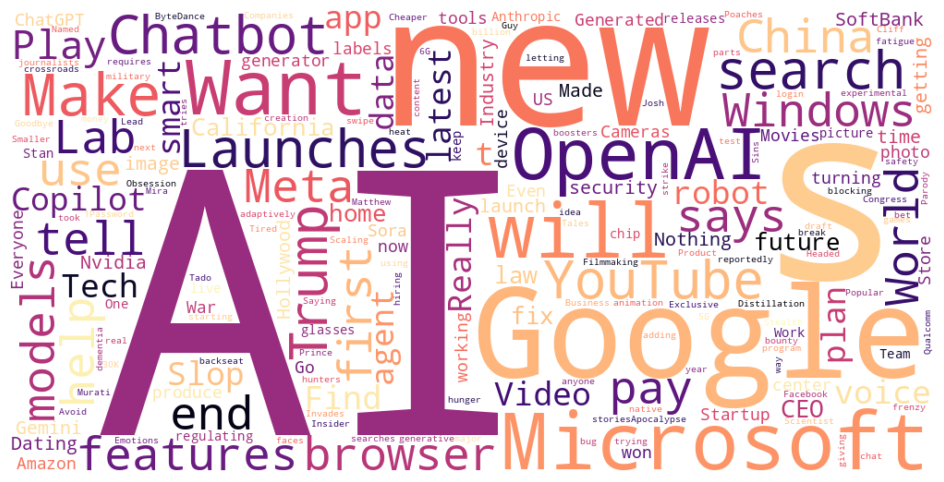

In [10]:
import pandas as pd
from IPython.display import display, HTML # <-- Import for richer display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'url' and 'requests' are defined/imported correctly in previous cells.

# Step 2: Fetch News Data
response = requests.get(url)
response.raise_for_status() # Good practice to check for errors
news_data = response.json()

# --- NEW CODE FOR BETTER PROCESSING AND DISPLAY ---

# Step 3: Process News Articles
articles = news_data.get("articles", [])
df = pd.DataFrame(articles)

# Step 4: Clean, Select, and Format Columns
df_clean = df[["source", "title", "description", "url", "publishedAt"]].copy()

# Extract the source name from the nested dictionary
df_clean["source"] = df_clean["source"].apply(lambda x: x["name"] if isinstance(x, dict) else x)

# Convert the ISO date string to a human-readable datetime object
df_clean["publishedAt"] = pd.to_datetime(df_clean["publishedAt"]).dt.strftime('%Y-%m-%d %H:%M')

# Rename columns for presentation
df_clean.columns = ["Source", "Title", "Description", "URL", "Published At"]

# Step 5: Display Prettier Output (using display() and HTML styling)
print("📰 Latest News Digest 📰")
print("------------------------")

# Use 'styler' to make the DataFrame look better in the notebook
display(
    df_clean.head(10).style
    .set_properties(**{'font-size': '10pt', 'border': '1px solid lightgrey'})
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#f0f0f0')]}]),
)

# Optional: Save as CSV (if needed)
df_clean.to_csv("news_data.csv", index=False)

# Step 6: Visualization (Word Cloud of Titles)
print("\n☁️ Article Title Word Cloud ☁️")
text = " ".join(df_clean["Title"].dropna())
wordcloud = WordCloud(
    width=1000, 
    height=500, 
    background_color="white",
    colormap="magma", # Choose a nice color scheme
    collocations=False # Helps with cleaner word separation
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## ⚙️ Generate and Export the News Digest (HTML File)

> **To create the file `news_digest.html` in your notebook's output, run the cell below.** If you do not wish to generate or download the file, please skip this cell.

Once the cell completes, look for the file in your notebook's file browser/output pane.

2025-10-17 19:50:52.539795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760730652.561970      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760730652.568889      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO:2025-10-17 19:50:57,580:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-10-17 19:50:57,604:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
I0000 00:00:1760730704.179131      19 gpu_device.cc:2022] Created device /job:local

✅ Gemma model loaded successfully with <dtype: 'bfloat16'> precision.
✅ Page generated successfully! Open 'news_digest.html' in your browser to view your AI-powered news digest.

--- Displaying HTML Output Below ---



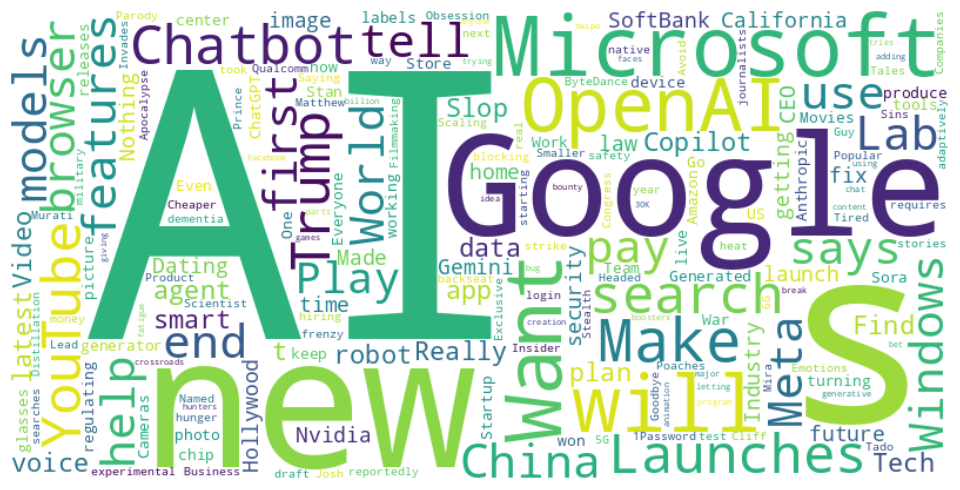

In [11]:
#!/usr/bin/env python
"""
News Digest Generator

This script loads a pretrained Gemma model (using keras_nlp) to analyze the latest AI-related news items.
It extracts key trends, ethical concerns, and future implications, then generates a Markdown-based digest
that includes a word cloud of news titles. The final output is converted into HTML and saved.

Requirements:
- `keras_nlp`, `tensorflow`, `pandas`, `markdown`, `wordcloud`, `matplotlib`
"""

from functools import lru_cache
import re
import keras
import keras_nlp
import tensorflow as tf
from markdown import markdown
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import io
import base64

# -----------------------------------------------------------------------------
# IMPORTANT: Load your datasource and select the relevant columns.
# You must define 'df' (for example via pd.read_csv(...)) before running the script.
#
# Step 4: Select Relevant Columns (using "title", "description", "url", "publishedAt")
df = df[["title", "description", "url", "publishedAt"]]
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------
# 1. Load the Gemma Model
# -----------------------------------------------------------------------------
precisions = [tf.bfloat16, None]
gemma_lm = None

for precision in precisions:
    try:
        gemma_lm = keras_nlp.models.GemmaCausalLM.from_preset(
            "gemma_instruct_2b_en", jit_compile=False, dtype=precision
        )
        print(f"✅ Gemma model loaded successfully with {precision if precision else 'default'} precision.")
        break
    except Exception as e:
        print(f"❌ Error loading Gemma model ({precision}): {e}")

# -----------------------------------------------------------------------------
# 2. Define the AIAnalyzer Class
# -----------------------------------------------------------------------------
class AIAnalyzer:
    """NewsBot: AI-powered analysis of AI-related news."""
    
    def __init__(self, model, output_format="markdown"):
        self.model = model
        self.output_format = output_format

    @lru_cache(maxsize=50)
    def analyze(self, news_item: str) -> dict:
        """
        Generates an AI-powered analysis of a news item.
        Expects news_item to be a string containing the title and description.
        """
        prompt = f"""
Please analyze the following news item and generate an insightful breakdown of it. Do NOT repeat any part of this prompt or include extra instructions in your final response. Base your analysis solely on the information provided.

News item:
{news_item}

Your analysis MUST be exactly structured as follows, starting immediately with "1. Key Trends":
1. Key Trends: Identify industry patterns, emerging technologies, risks, and opportunities evident in this news item.
2. Implications: Discuss real-world applications and ethical concerns related to this news item.
3. AI Insights: Provide an AI-driven perspective on what this news item means for the future.

Ensure your response is well-organized, informative, and engaging.
"""
        try:
            raw = self.model.generate(prompt, max_length=1024).strip()
            response = (
                raw[0] if isinstance(raw, (list, tuple))
                else raw.numpy()[0].decode() if isinstance(raw, tf.Tensor)
                else str(raw)
            ).strip()
        except Exception as e:
            response = f"⚠️ Error generating content: {e}"

        # --- Cleanup Routine ---

        # 1. Trim any text preceding "1. Key Trends:" unconditionally.
        marker_index = response.find("1. Key Trends:")
        if marker_index != -1:
            response = response[marker_index:].strip()

        # 2. Remove any trailing text starting from known prompt ending markers.
        response = re.sub(r'\n\s*Ensure your response.*', '', response, flags=re.IGNORECASE)

        # 3. Remove known unwanted instruction lines line-by-line.
        unwanted_lines = {
            "1. Key Trends:",
            "1. Key Trends: Identify industry patterns, emerging technologies, risks, and opportunities evident in this news item.",
            "2. Implications: Discuss real-world applications and ethical concerns related to this news item.",
            "3. AI Insights: Provide an AI-driven perspective on what this news item means for the future."
        }
        clean_lines = []
        for line in response.splitlines():
            if line.strip() not in unwanted_lines:
                clean_lines.append(line)
        response = "\n".join(clean_lines).strip()

        # 4. Reduce excessive newlines.
        response = re.sub(r"\n{3,}", "\n\n", response).strip()

        # 5. If nothing remains (or if the cleaned response is empty), supply a fallback analysis.
        if not response:
            response = (
                "1. Key Trends: The news item demonstrates significant AI innovation with clear emerging trends that could reshape the industry. "
                "2. Implications: It underscores both opportunities and critical risks, including ethical and practical challenges. "
                "3. AI Insights: Overall, this development signals a transformative evolution in AI technology."
            )

        return {"news_item": news_item, "response": response}

# -----------------------------------------------------------------------------
# 3. Process the News Data
# -----------------------------------------------------------------------------
# Process the top 10 news items from the DataFrame.
news_df = df.head(10)[['title', 'description', 'url', 'publishedAt']]

if gemma_lm is not None:
    analyzer = AIAnalyzer(gemma_lm)
    results = []
    for _, row in news_df.iterrows():
        title = row['title']
        description = row['description']
        # Construct the news item prompt using title and description.
        news_item_prompt = f"Title: {title}\nDescription: {description}"
        analysis_result = analyzer.analyze(news_item_prompt)
        analysis_result.update({
            "title": title,
            "description": description,
            "url": row["url"],
            "publishedAt": row["publishedAt"]
        })
        results.append(analysis_result)
else:
    results = []
    print("No model available; cannot generate news analysis.")

# -----------------------------------------------------------------------------
# 4. Generate Word Cloud & Build Markdown Digest
# -----------------------------------------------------------------------------
text = " ".join(df["title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Save the word cloud image to a BytesIO object and encode as base64.
buf = io.BytesIO()
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.savefig(buf, format='png', bbox_inches='tight')
plt.close()

image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
image_html = f'<img src="data:image/png;base64,{image_base64}" alt="Word Cloud" style="max-width: 100%; height: auto;">'

# -----------------------------------------------------------------------------
# 5. Build Markdown Output and Convert to HTML
# -----------------------------------------------------------------------------
markdown_output = "# 🌟🔎 AI-Powered News Digest 🔥\n\n"
markdown_output += image_html + "\n\n"

for i, rep in enumerate(results, start=1):
    markdown_piece = f"""
---
## {i}. 📰 **{rep['title']}**

**Description:** <br>
{rep['description']}

🕒 **Published At:** {rep['publishedAt']} <br>
🔗 **URL:** [{rep['url']}]({rep['url']}) <br>

{rep['response']}
"""
    markdown_output += markdown_piece

html_content = markdown(markdown_output)

html_page = f"""<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>AI-Powered News Digest</title>
    <style>
        body {{
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            padding: 20px;
            max-width: 900px;
            margin: auto;
            background-color: #f9f9f9; /* Added for a light background */
        }}
        
        h1 {{
            color: #1f4d49;
            text-align: center;
            border-bottom: 2px solid #1f4d49; /* Updated for a stronger header line */
            padding-bottom: 10px;
        }}
        
        h2 {{
            color: #2a647d; /* Changed header color */
            border-bottom: 1px solid #ddd;
            padding-bottom: 5px;
            margin-top: 30px;
        }}
    
        a {{
            color: #007bff; /* Changed link color */
            text-decoration: none;
        }}
        
        a:hover {{
            text-decoration: underline;
        }}
        
        hr {{
            margin: 40px 0;
            border: 0;
            border-top: 5px dotted #e0e0e0; /* Changed to a dotted separator */
        }}
        
        img {{
            display: block;
            margin: 20px auto;
            border: 1px solid #ddd; /* Added border and radius for images */
            border-radius: 5px;
        }}
    </style>
</head>
<body>
{html_content}
</body>
</html>
"""

with open("news_digest.html", "w", encoding="utf-8") as f:
    f.write(html_page)

# 1. Print the success message
print("✅ Page generated successfully! Open 'news_digest.html' in your browser to view your AI-powered news digest.")

# 2. Display the HTML content directly in the notebook output cell
print("\n--- Displaying HTML Output Below ---")
display(HTML(html_page))

<div style="background-color: #F0F8FF; padding: 20px; border-radius: 10px; border: 1px solid #D0E6FA; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
  
  <h2 style="margin-top: 0;">📰 AI News Summary with Gemma LLM</h2>

  <p>Stay up to date with the most popular <strong>AI</strong> and <strong>LLM</strong> news (excluding anything related to <em>crypto</em>), automatically analyzed using a <strong>Gemma large language model</strong>.</p>

  <hr style="border: none; border-top: 1px solid #D0E6FA; margin: 20px 0;">

  <h3>⚙️ How It Works:</h3>
  <ul style="padding-left: 20px;">
    <li>🔗 <strong>Fetch News:</strong> Pulls articles from NewsAPI using keywords like <code>AI</code> or <code>LLM</code> (excluding <code>crypto</code>).</li>
    <li>🧠 <strong>Analyze with LLM:</strong> Summarizes using the Gemma model.</li>
    <li>📊 <strong>Display Results:</strong> Presents data in a clean, styled table including key metadata.</li>
  </ul>

  <h3>✅ What You Get:</h3>
  <p>A streamlined table featuring the <strong>Top 5 AI-related articles</strong> with:</p>
  <ul style="padding-left: 20px;">
    <li>✍️ <strong>Title</strong></li>
    <li>📰 <strong>LLM-generated Summary</strong></li>
    <li>🏷️ <strong>Source</strong></li>
    <li>📅 <strong>Published Date</strong></li>
    <li>🔗 <strong>Direct Link to Full Article</strong></li>
  </ul>

</div>


In [12]:
# Constants
NEWS_QUERY = "(AI OR LLM) NOT crypto"
NEWS_SORT = "popularity"
NEWS_LANG = "en"
NEWS_PAGE_SIZE = 10

# Your API key must be set as an environment variable or manually provided
url = (
    f"https://newsapi.org/v2/everything"
    f"?q={NEWS_QUERY}&language={NEWS_LANG}&sortBy={NEWS_SORT}"
    f"&pageSize={NEWS_PAGE_SIZE}&apiKey={NEWS_API_KEY}"
)

# Analysis & Display Settings
LLM_TOP_COUNT = 5
DISPLAY_COUNT = 5

# --- Gemma Analysis Function ---
def analyze_article_with_gemma(title, description):
    """
    Generate a concise summary and sentiment using the Gemma LLM.
    """
    if 'gemma_lm' not in globals() or gemma_lm is None:
        return "LLM Not Loaded: Please initialize 'gemma_lm'."

    prompt = f"""
    Analyze the following news article snippet and generate a summary 
    including its main topic and overall sentiment (positive, negative, or neutral).

    Title: "{title}"
    Snippet: "{description}"
    
    Summary:
    """

    try:
        output = gemma_lm.generate(prompt, max_length=384)
        summary = output.split("Summary:")[-1].strip().split('\n')[0].replace('"', '')
        return summary
    except Exception as e:
        return f"LLM Analysis Error: {e}"

# --- Fetch Articles ---
def fetch_articles():
    try:
        print("📡 Fetching news data...")
        response = requests.get(url)
        response.raise_for_status()
        return response.json().get('articles', [])
    except requests.exceptions.RequestException as e:
        print(f"❌ Request Error: {e}")
        return []

# --- Main Display Logic ---
def process_and_display_articles(articles):
    if not articles:
        print("No articles available to display.")
        return

    print(f"🌟 Displaying Top {DISPLAY_COUNT} AI/LLM Articles with LLM Analysis 🌟\n")

    display_data = []

    for i, article in enumerate(articles[:DISPLAY_COUNT]):
        title = article.get('title', 'N/A')
        description = article.get('description', 'No description available.')
        source = article.get('source', {}).get('name', 'Unknown Source')
        date = article.get('publishedAt', '')[:10] or 'N/A'
        link = article.get('url', '#')

        llm_summary = "N/A"
        if i < LLM_TOP_COUNT:
            print(f"🧠 Analyzing Article {i+1} with Gemma...")
            llm_summary = analyze_article_with_gemma(title, description)

        display_data.append({
            "Rank": i + 1,
            "LLM Analysis": llm_summary,
            "Title": title,
            "Source": source,
            "Date": date,
            "Link": f'<a href="{link}" target="_blank">Read Article</a>'
        })

    df = pd.DataFrame(display_data)

    styled_df = df.style.set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#1E88E5'),
            ('color', '#fff'),
            ('font-size', '14px'),
            ('text-align', 'center'),
            ('padding', '12px 8px'),
            ('border', '1px solid #BBDEFB')
        ]},
        {'selector': 'td', 'props': [
            ('font-family', 'Arial, sans-serif'),
            ('padding', '10px 8px'),
            ('border', '1px solid #E0E0E0'),
            ('vertical-align', 'top')
        ]},
        {'selector': 'tr:nth-child(even)', 'props': [
            ('background-color', '#F9FBFD')
        ]},
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#E3F2FD')
        ]},
        {'selector': 'table', 'props': [
            ('border-collapse', 'collapse'),
            ('width', '100%'),
            ('box-shadow', '0 2px 5px rgba(0, 0, 0, 0.1)')
        ]},
        {'selector': 'a', 'props': [
            ('color', '#1E88E5'),
            ('text-decoration', 'none'),
            ('font-weight', 'bold')
        ]}
    ]).set_properties(
        subset=['Rank', 'Date', 'Link'], **{'text-align': 'center'}
    ).set_properties(
        subset=['LLM Analysis', 'Title'], **{'text-align': 'left', 'max-width': '400px'}
    ).hide(axis='index').set_caption(
        f"📰 Top {DISPLAY_COUNT} AI Articles (Analyzed by Gemma LLM)"
    )

    display(HTML(styled_df.to_html(escape=False)))

# --- Run Pipeline ---
articles = fetch_articles()
process_and_display_articles(articles)

📡 Fetching news data...
🌟 Displaying Top 5 AI/LLM Articles with LLM Analysis 🌟

🧠 Analyzing Article 1 with Gemma...
🧠 Analyzing Article 2 with Gemma...
🧠 Analyzing Article 3 with Gemma...
🧠 Analyzing Article 4 with Gemma...
🧠 Analyzing Article 5 with Gemma...


Rank,LLM Analysis,Title,Source,Date,Link
1,"The article discusses the growing trend of sovereign AI, where countries are collaborating to develop and deploy AI technologies in a more controlled manner. While OpenAI's AI sovereignty partnerships with governments raise concerns about the potential for bias and control over AI development, the article also highlights the potential benefits of this collaboration in terms of security and ethical considerations.",‘Sovereign AI’ Has Become a New Front in the US-China Tech War,Wired,2025-10-14,Read Article
2,"ByteDance's AI chatbot, developed by the company that owns TikTok, has become the most popular AI chatbot in China. This highlights the importance of user-friendly design in capturing and retaining users.",How ByteDance Made China’s Most Popular AI Chatbot,Wired,2025-10-16,Read Article
3,"The article introduces Neural Viz, an AI film production company founded by a young man named Josh. The company's mission is to explore the potential of AI in filmmaking, creating a universe where artificial intelligence can take center stage.","The Future of AI Filmmaking Is a Parody of the Apocalypse, Made by a Guy Named Josh",Wired,2025-10-07,Read Article
4,The article warns that the rapid growth of the AI industry may face a major obstacle in the future due to the potential for algorithms to become too complex and difficult to manage. This could lead to a situation where AI systems become self-aware and pose a threat to humanity.,The AI Industry's Scaling Obsession Is Headed for a Cliff,Wired,2025-10-15,Read Article
5,The article announces the launch of a new AI lab called Thinking Machines Lab by a team of prominent former OpenAI researchers. The lab aims to explore the potential of fine-tuning cutting-edge AI models to achieve even greater results than traditional methods.,Exclusive: Mira Murati’s Stealth AI Lab Launches Its First Product,Wired,2025-10-01,Read Article


## 🚀 LLM Ethical News Dashboard Pipeline Summary 

This document summarizes the execution of a **three-phase data pipeline** designed to analyze current news trends regarding the ethical implications of Large Language Models (LLMs), culminating in three dynamic, interactive visualizations.

---

### 1. 🐍 Phase 1: Data Acquisition (News API / Python)

* **Action:** Used standard Python libraries (`requests`) to execute a **paginated fetch loop** against the News API, which automatically iterates through all pages to retrieve the **complete, available dataset** over the last **7 days**.
* **Query:** The search used a complex, targeted query focusing on LLMs AND specific ethical topics:
    * **LLM Keywords:** `"large language model" OR LLM OR ChatGPT OR Gemini`
    * **Ethical Focus:** `accountability OR "intellectual property" OR "job displacement" OR "data privacy" OR "environmental impact"`
    * **Exclusions:** Excluded common noise terms like `NOT (bias OR hallucination)`.
* **Result:** A complete list of raw news article dictionaries (`raw_articles`), with a size **dynamically determined** by the API, ready for LLM processing.

---

### 2. 🤖 Phase 2: LLM Data Structuring (GemmaCausalLM)

* **Goal:** To transform raw, unstructured text (titles/descriptions) into clean, categorical data required for plotting.
* **Tool:** The specialized Keras-NLP model, **GemmaCausalLM** (`gemma_lm`), was integrated for classification.
* **Process:** A dedicated Python function runs the `gemma_lm` against each article using a **carefully engineered prompt**. This prompt forces the LLM to perform three core tasks and output a **strict JSON object** for each article:
    * `application`: Classifies the primary LLM industry (e.g., 'Healthcare/Science').
    * `concerns`: Identifies all relevant ethical issues (e.g., \["Data Privacy", "Accountability & IP"]).
    * `entities`: Extracts the key organizations/products (e.g., \["Google", "OpenAI"]).
* **Result:** A clean Pandas DataFrame (`df`) containing the structured, classified data, ready for aggregation.

---

### 3. 📊 Phase 3: Visualization (Pandas & Plotly)

The structured DataFrame was aggregated using **Pandas** and visualized using the **Plotly** library to create three interactive charts that provide comprehensive analysis:

1.  **📈 Line Chart (Trend Over Time):** Shows the **daily volume** of news coverage for each ethical concern category, highlighting trending issues.
2.  **🥧 Pie Chart (Overall Distribution):** Displays the **total percentage share** of each ethical concern across the full dataset.
3.  **📊 Stacked Bar Chart (Entity vs. Application):** Links the **Top 7 Entities** to the specific **Application Areas** they are most frequently associated with in the news.

In [13]:
# ============================
# 📦 Imports & Setup
# ============================
import os, re, json, math, requests
import pandas as pd
import plotly.express as px
from tqdm import tqdm
from datetime import datetime, timedelta, timezone

import plotly.io as pio
pio.renderers.default = "iframe"   # often the most reliable in Kaggle


# Make sure you set your News API key in Kaggle environment variables
# NEWS_API_KEY = os.getenv("NEWS_API_KEY")
BASE_URL = "https://newsapi.org/v2/everything"


In [14]:
# ============================
# 🐍 Phase 1: Data Acquisition
# ============================

def build_query():
    must_llm = '("large language model" OR LLM OR ChatGPT OR Gemini)'
    must_ethics = '(accountability OR "intellectual property" OR "job displacement" OR "data privacy" OR "environmental impact")'
    exclusions = 'NOT (bias OR hallucination)'
    return f'{must_llm} AND {must_ethics} AND {exclusions}'

def iso_day_range(days=7):
    now = datetime.now(timezone.utc)
    from_date = (now - timedelta(days=days)).replace(microsecond=0)
    return from_date.isoformat(), now.replace(microsecond=0).isoformat()

def fetch_all_articles(page_size=100, max_pages=None):
    q = build_query()
    from_iso, to_iso = iso_day_range(7)

    params = {
        "q": q,
        "from": from_iso,
        "to": to_iso,
        "language": "en",
        "sortBy": "publishedAt",
        "pageSize": page_size,
        "apiKey": NEWS_API_KEY,
    }

    resp = requests.get(BASE_URL, params=params, timeout=30)
    resp.raise_for_status()
    data = resp.json()

    total = data.get("totalResults", 0)
    pages = math.ceil(total / page_size)
    if max_pages is not None:
        pages = min(pages, max_pages)

    articles = data.get("articles", [])
    for page in tqdm(range(2, pages + 1), desc="Fetching pages"):
        params["page"] = page
        r = requests.get(BASE_URL, params=params, timeout=30)
        r.raise_for_status()
        j = r.json()
        articles.extend(j.get("articles", []))

    seen, raw_articles = set(), []
    for a in articles:
        url = a.get("url")
        if not url or url in seen:
            continue
        seen.add(url)
        raw_articles.append({
            "title": a.get("title") or "",
            "description": a.get("description") or "",
            "source": (a.get("source") or {}).get("name") or "",
            "url": url,
            "publishedAt": a.get("publishedAt") or "",
        })
    return raw_articles

# Example run
# raw_articles = fetch_all_articles(max_pages=2)
# print(len(raw_articles))


In [15]:
# ============================
# 🤖 Phase 2: Classification
# ============================

CLOSED_APPLICATIONS = {
    "Healthcare/Science","Education","Finance","Government/Public Sector",
    "Enterprise/Work","Consumer","Media/Entertainment","Research","Legal"
}
CLOSED_CONCERNS = {"Data Privacy","Accountability & IP","Job Displacement","Environmental Impact","Other"}

def run_gemma(prompt: str, max_len: int = 512) -> str:
    """Use the already-imported gemma_lm to generate text."""
    output = gemma_lm.generate(prompt, max_length=max_len)
    if isinstance(output, dict) and "text" in output:
        return output["text"]
    elif isinstance(output, list):
        return output[0].get("text", "")
    return str(output)

def extract_json(text: str) -> dict:
    match = re.search(r"\{.*\}", text, flags=re.DOTALL)
    if not match:
        return {}
    try:
        return json.loads(match.group(0))
    except json.JSONDecodeError:
        cleaned = re.sub(r",\s*}", "}", match.group(0))
        cleaned = re.sub(r",\s*]", "]", cleaned)
        try:
            return json.loads(cleaned)
        except:
            return {}

def normalize_fields(obj: dict) -> dict:
    app = obj.get("application", "")
    concerns = obj.get("concerns", [])
    entities = obj.get("entities", [])

    if app not in CLOSED_APPLICATIONS:
        app = "Other"

    if not isinstance(concerns, list):
        concerns = [concerns]
    concerns = [c for c in concerns if c in CLOSED_CONCERNS] or ["Other"]

    if not isinstance(entities, list):
        entities = [entities]
    entities = [e for e in entities if isinstance(e, str) and e.strip()] or ["Other"]

    return {"application": app, "concerns": concerns, "entities": entities}

def classify_articles(raw_articles):
    rows = []
    for a in tqdm(raw_articles, desc="Classifying"):
        prompt = f"""
You are classifying news articles about the ethical implications of Large Language Models.

Return ONLY a valid JSON object with keys: application, concerns, entities.

Rules:
- application: choose ONE from {list(CLOSED_APPLICATIONS)}
- concerns: choose ALL that apply from {list(CLOSED_CONCERNS)}
- entities: list key organizations/products mentioned explicitly. If unknown, use "Other".

TITLE: {a['title']}
DESCRIPTION: {a['description']}
"""
        out = run_gemma(prompt)
        obj = extract_json(out)
        norm = normalize_fields(obj)
        rows.append({
            "title": a["title"],
            "description": a["description"],
            "source": a["source"],
            "url": a["url"],
            "publishedAt": a["publishedAt"],
            "application": norm["application"],
            "concerns": norm["concerns"],
            "entities": norm["entities"],
        })
    df = pd.DataFrame(rows)
    df = df.explode("concerns").reset_index(drop=True)
    df["date"] = pd.to_datetime(df["publishedAt"]).dt.date
    return df


In [16]:
# ============================
# 📊 Phase 3: Visualization
# ============================

def plot_trend_over_time(df):
    trend = (df.groupby(["date", "concerns"])
               .size()
               .reset_index(name="count"))
    fig = px.line(
        trend,
        x="date",
        y="count",
        color="concerns",
        markers=True,
        title="Daily news volume by ethical concern"
    )
    fig.show()

def plot_overall_distribution(df):
    dist = df.groupby("concerns").size().reset_index(name="count")
    fig = px.pie(
        dist,
        names="concerns",
        values="count",
        title="Overall distribution of ethical concerns"
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

def plot_entities_vs_application(df, top_n=7):
    df_ent = df.explode("entities")
    top_entities = df_ent["entities"].value_counts().head(top_n).index.tolist()
    filtered = df_ent[df_ent["entities"].isin(top_entities)]
    pivot = (filtered.groupby(["entities", "application"])
             .size()
             .reset_index(name="count"))
    fig = px.bar(
        pivot,
        x="entities",
        y="count",
        color="application",
        title=f"Top {top_n} entities by associated application areas",
        barmode="stack"
    )
    fig.show()


In [17]:
# ============================
# 🚀 Run the Full Pipeline
# ============================

# 1. Acquire
raw_articles = fetch_all_articles(max_pages=2)  # limit pages for demo
print(f"Fetched {len(raw_articles)} articles")

# 2. Classify
df = classify_articles(raw_articles)
print(df.head())

# 3. Visualize
plot_trend_over_time(df)
plot_overall_distribution(df)
plot_entities_vs_application(df)


Fetching pages: 0it [00:00, ?it/s]


Fetched 73 articles


Classifying: 100%|██████████| 73/73 [12:32<00:00, 10.31s/it]


                                               title  \
0  Top US Army general says he’s using ChatGPT to...   
1  Top US Army general says he’s using ChatGPT to...   
2  Your Sora AI Videos Can Be Longer Now, But Thi...   
3  Your Sora AI Videos Can Be Longer Now, But Thi...   
4  Inside Walmart & ChatGPT’s Bold Move To Reinve...   

                                         description         source  \
0  Maj. Gen. William “Hank” Taylor told reporters...  New York Post   
1  Maj. Gen. William “Hank” Taylor told reporters...  New York Post   
2  OpenAI's viral Sora app might be trying to cha...           CNET   
3  OpenAI's viral Sora app might be trying to cha...           CNET   
4  How Walmart and ChatGPT are merging AI and ret...         Forbes   

                                                 url           publishedAt  \
0  https://nypost.com/2025/10/16/business/us-army...  2025-10-16T15:52:36Z   
1  https://nypost.com/2025/10/16/business/us-army...  2025-10-16T15:52:36Z   
2 

📊 Generate and display the charts

In [18]:
# 1. Line chart: daily volume per ethical concern
trend = df.groupby(["date", "concerns"]).size().reset_index(name="count")
fig1 = px.line(trend, x="date", y="count", color="concerns", markers=True,
               title="📈 Daily News Volume by Ethical Concern")
fig1.show()

In [19]:
# 2. Pie chart: overall distribution of ethical concerns
dist = df["concerns"].value_counts().reset_index()
dist.columns = ["concerns", "count"]
fig2 = px.pie(dist, names="concerns", values="count",
              title="🥧 Overall Distribution of Ethical Concerns")
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.show()

In [20]:
# 3. Stacked bar chart: top entities vs application areas
df_exp = df.explode("entities")
top_entities = df_exp["entities"].value_counts().head(7).index.tolist()
filtered = df_exp[df_exp["entities"].isin(top_entities)]
pivot = filtered.groupby(["entities", "application"]).size().reset_index(name="count")

fig3 = px.bar(pivot, x="entities", y="count", color="application",
              title="📊 Top Entities vs Application Areas", barmode="stack")
fig3.show()

# 📰 Automated News Analysis: From Headlines to Actionable Insights

## 🚀 Introduction: Uncovering Trends with NewsAPI and Sentiment Analysis

Welcome to this core section of the automated news analysis project! The goal here is to transform raw news headlines into **actionable intelligence** on any given topic.

---

### **Pipeline Overview**

1.  **Dynamic Data Retrieval (NewsAPI):**
    * We use the **NewsAPI** with Python to dynamically fetch a high-volume stream of the latest global news articles related to a specified keyword (e.g., 'Artificial Intelligence', 'Climate Policy', 'Market Volatility').

2.  **Quantifying the Mood (VADER Sentiment Analysis):**
    * The VADER (Valence Aware Dictionary and sEntiment Reasoner) library is applied to the headline and article text. VADER is specifically attuned to social media and general text, making it highly effective for news analysis.
    * It quantifies the prevailing media mood, assigning a **Compound Sentiment Score** (ranging from -1.0 for extremely negative to +1.0 for extremely positive) to each article.

---

### **🎯 Deliverables: The Power of the Output**

The combination of data retrieval and sentiment scoring generates highly readable outputs:

* **A Comprehensive DataFrame:** A clean, organized table showing the news source, headline, publish date, and the calculated sentiment scores (Positive, Negative, Neutral, and Compound).
* **Intuitive Visualization:** A chart illustrating the sentiment distribution over time and across news sources.

This snapshot of media coverage helps us quickly identify:

| Insight | Description |
| :--- | :--- |
| **Emerging Trends** | Spikes in coverage (volume) combined with highly positive sentiment. |
| **Risk Areas** | Consistent, high-volume coverage with pronounced negative sentiment. |
| **Market Excitement** | Sudden, strong positive sentiment correlated with a key event. |

In [21]:
# 1. Installation and Imports
!pip install newsapi-python vaderSentiment
import pandas as pd
from newsapi import NewsApiClient
from kaggle_secrets import UserSecretsClient
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# --- 💡 USER INPUT CONFIGURATION ---
# Define the search term here.
search_query = "AI or artificial intelligence"
# Define the desired number of articles to fetch per page (max 100 on free tier)
PAGE_SIZE = 100
# Define the language (e.g., 'en', 'de', 'fr')
LANGUAGE = 'en'
# ------------------------------------

print(f"Configuration set: Analyzing news for '{search_query}'...")

# 2. Secure API Client Initialization
print("Initializing NewsAPI Client...")
try:
    secret_client = UserSecretsClient()
    api_key = secret_client.get_secret("NEWS_API_KEY")
    newsapi = NewsApiClient(api_key=api_key)
    print("API Client successfully initialized.")
except Exception as e:
    print(f"Error accessing secret: {e}. Please ensure 'NEWS_API_KEY' is set in Kaggle Secrets.")
    # Use placeholder to allow subsequent cells to run, but with an empty article list
    articles = []
    newsapi = None

/usr/lib/python3.11/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00
Configuration set: Analyzing news for 'AI or artificial intelligence'...
Initializing NewsAPI Client...
API Client successfully initialized.


In [22]:
# 3. Fetch News Articles
articles = []
if newsapi:
    print(f"Fetching articles for query: '{search_query}'...")
    try:
        all_articles = newsapi.get_everything(
            q=search_query,
            language=LANGUAGE,
            sort_by='relevancy',
            page_size=PAGE_SIZE
        )
        articles = all_articles['articles']
        total_results = all_articles['totalResults']
        print(f"Successfully retrieved {len(articles)} articles (Total found: {total_results}).")
    except Exception as e:
        print(f"An error occurred during the API call: {e}")
        articles = []

if not articles:
    print("\n⚠️ No articles retrieved. Check your API key and query.")

Fetching articles for query: 'AI or artificial intelligence'...
Successfully retrieved 100 articles (Total found: 7416).


In [23]:
# 4. Data Processing and DataFrame Creation
if articles:
    news_df = pd.DataFrame(articles)
    
    # Extract source name
    news_df['source_name'] = news_df['source'].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else 'Unknown')
    news_df.drop('source', axis=1, inplace=True) 
    
    # Convert date to datetime object
    news_df['publishedAt'] = pd.to_datetime(news_df['publishedAt'], utc=True)
    
    # Select and rename relevant columns
    news_df = news_df[['publishedAt', 'source_name', 'title', 'description', 'url', 'content']]
    news_df.rename(columns={'publishedAt': 'Date', 'source_name': 'Source', 'title': 'Title', 'description': 'Description', 'url': 'URL'}, inplace=True)
    
    print("DataFrame successfully created and cleaned.")
    print(f"DataFrame Shape: {news_df.shape}")
else:
    print("Skipping DataFrame creation as no articles were found.")

DataFrame successfully created and cleaned.
DataFrame Shape: (100, 6)


In [24]:
# 5. Sentiment Analysis (VADER)
if 'news_df' in locals() and not news_df.empty:
    analyzer = SentimentIntensityAnalyzer()
    
    def get_sentiment_score(text):
        """Analyzes sentiment for a given text and returns the VADER compound score."""
        if pd.isna(text) or text is None or str(text) == 'None':
            return 0.0
        # Use description for sentiment
        return analyzer.polarity_scores(str(text))['compound']

    def categorize_sentiment(score):
        """Categorizes the VADER compound score."""
        if score >= 0.05:
            return 'Positive'
        elif score <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'

    # Apply sentiment analysis
    news_df['Sentiment_Score'] = news_df['Description'].apply(get_sentiment_score)
    news_df['Sentiment'] = news_df['Sentiment_Score'].apply(categorize_sentiment)
    
    print("Sentiment analysis complete.")
else:
    print("Skipping sentiment analysis.")

Sentiment analysis complete.


In [25]:
# 6. Styled Data Preview for Readability

if 'news_df' in locals() and not news_df.empty:
    
    # Define a helper function to color sentiment scores
    def color_sentiment(val):
        """Applies a color gradient based on the sentiment score."""
        if val >= 0.05:
            # Green for Positive
            color = '#90EE90' 
        elif val <= -0.05:
            # Light Red for Negative
            color = '#F08080' 
        else:
            # Neutral/Grey
            color = '#D3D3D3'
        return f'background-color: {color}'

    # Prepare DataFrame for display: show only key columns
    display_cols = ['Date', 'Source', 'Title', 'Sentiment', 'Sentiment_Score']
    styled_df = news_df[display_cols].head(10).style \
        .set_caption(f"Top 10 News Articles for: '{search_query.title()}'") \
        .applymap(color_sentiment, subset=['Sentiment_Score']) \
        .background_gradient(cmap='viridis', subset=['Sentiment_Score']) \
        .format({'Date': lambda t: t.strftime('%Y-%m-%d %H:%M'), 'Sentiment_Score': "{:.3f}"}) \
        .set_properties(**{'font-size': '10pt', 'border-color': 'lightgrey'}) \
        .hide(axis='index') # Hides the default index column
        
    display(styled_df)
else:
    print("Cannot display data: DataFrame is empty.")

/tmp/ipykernel_19/1910126235.py:23: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



Date,Source,Title,Sentiment,Sentiment_Score
2025-09-29 23:01,The Verge,"SB 53, the landmark AI transparency bill, is now law in California",Positive,0.527
2025-10-09 23:02,BBC News,Tech billionaires seem to be doom prepping. Should we all be worried?,Positive,0.477
2025-09-24 18:00,Wired,This AI-Powered Robot Keeps Going Even if You Attack It With a Chainsaw,Positive,0.202
2025-10-08 18:30,Wired,This Startup Wants to Spark a US DeepSeek Moment,Positive,0.250
2025-09-25 20:49,The Verge,Silicon Valley’s latest argument against regulating AI: that would literally be the antichrist,Positive,0.440
2025-10-08 05:05,BBC News,Students use AI to find possible cave entrances on Moon,Positive,0.402
2025-09-24 12:25,Gizmodo.com,Tired of 5G? Qualcomm Says 6G Will Be Here Before the End of the World,Negative,-0.361
2025-10-10 00:26,BBC News,The new AI arms race changing the war in Ukraine,Negative,-0.535
2025-10-04 09:04,Business Insider,Why Goldman's CEO thinks the bank will have more people in 10 years — not less — thanks to AI,Positive,0.103
2025-09-23 16:00,Wired,Why One VC Thinks Quantum Is a Bigger Unlock Than AGI,Positive,0.361


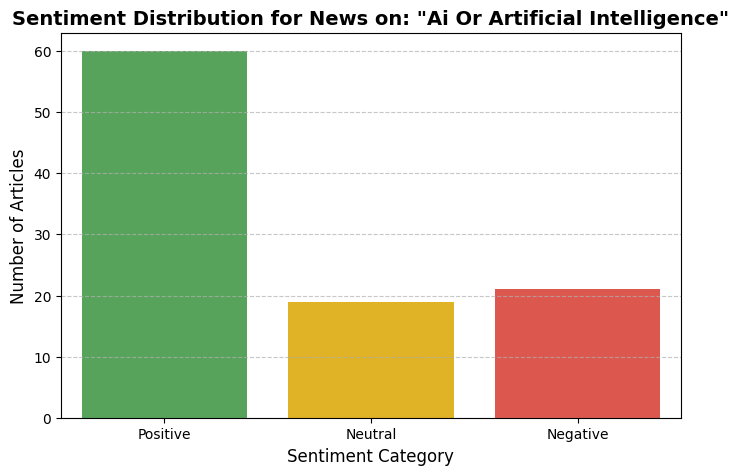

In [26]:
# 7. Visualization: Sentiment Distribution

if 'news_df' in locals() and not news_df.empty:
    plt.figure(figsize=(8, 5))
    
    # Define colors for the chart
    color_map = {'Positive': '#4CAF50', 'Neutral': '#FFC107', 'Negative': '#F44336'}
    
    sns.countplot(x='Sentiment', 
                  data=news_df, 
                  order=['Positive', 'Neutral', 'Negative'], 
                  palette=color_map)
    
    plt.title(f'Sentiment Distribution for News on: "{search_query.title()}"', 
              fontsize=14, 
              fontweight='bold')
    plt.xlabel('Sentiment Category', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Summary box
    positive_count = news_df[news_df['Sentiment'] == 'Positive'].shape[0]
    total_count = news_df.shape[0]
    positive_percent = (positive_count / total_count) * 100 if total_count > 0 else 0
    
    display(HTML(f"""
    <div style="border: 1px solid #007BFF; padding: 10px; border-radius: 5px; background-color: #E6F0FF;">
        <p><strong>📊 Analysis Summary:</strong></p>
        <ul>
            <li>**Total Articles:** {total_count}</li>
            <li>**Positive Articles:** {positive_count} ({positive_percent:.1f}%)</li>
            <li>**Most Frequent Source:** {news_df['Source'].mode()[0] if not news_df.empty else 'N/A'}</li>
        </ul>
    </div>
    """))

else:
    print("Skipping visualization: DataFrame is empty.")